In [1]:
import os
import tensorflow as tf
from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = r'C:\Users\Steven\CIS579-Project\Code3\training'
val_dir = r'C:\Users\Steven\CIS579-Project\Code3\validation'

In [3]:
img_width, img_height = 150, 150

In [4]:
epochs = 2
batch_size=32

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1383 images belonging to 3 classes.
Found 248 images belonging to 3 classes.


In [7]:
from tensorflow.keras.layers import (
    Dense, Dropout, Activation, Flatten,
    Conv2D, MaxPooling2D
)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# minor moderate and severe (3)
model.add(Dense(3, activation='softmax')) #UPDATED FROM 3 TO 12

C:\Users\Steven\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(train_generator, epochs=16, validation_data=val_generator)

C:\Users\Steven\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.3145 - loss: 1.3230

C:\Users\Steven\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 24s 501ms/step - accuracy: 0.3151 - loss: 1.3194 - val_accuracy: 0.4516 - val_loss: 1.0548
Epoch 2/2
44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 294ms/step - accuracy: 0.4024 - loss: 1.0781 - val_accuracy: 0.5121 - val_loss: 1.0565


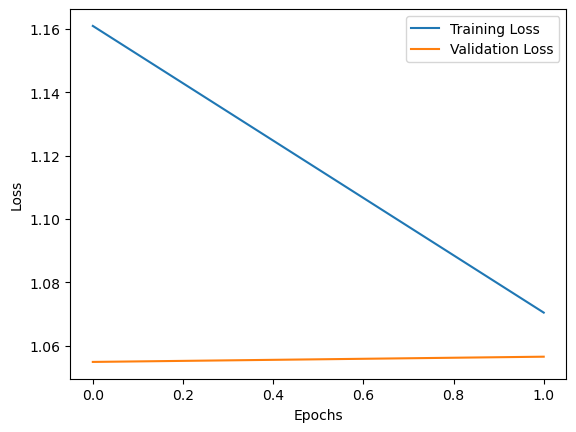

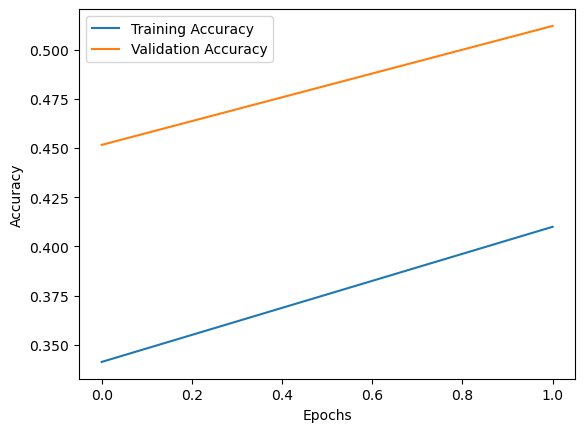

In [10]:
import matplotlib.pyplot as plt
# loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
from sklearn.metrics import f1_score
# # f1 score
# plt.plot(history.history['f1_score'], label='Training F1 Score')
# plt.plot(history.history['val_f1_score'], label='Validation F1 Score')
# plt.xlabel('Epochs')
# plt.ylabel('F1 Score')
# plt.legend()
# plt.show()


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Confusion Matrix:


C:\Users\Steven\AppData\Local\Temp\ipykernel_44152\2825883451.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + class_names, rotation=45) #CHANGED TO SAY CLASS_NAMES
C:\Users\Steven\AppData\Local\Temp\ipykernel_44152\2825883451.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + class_names) #cHANGED TO SAY CLASS NAMES


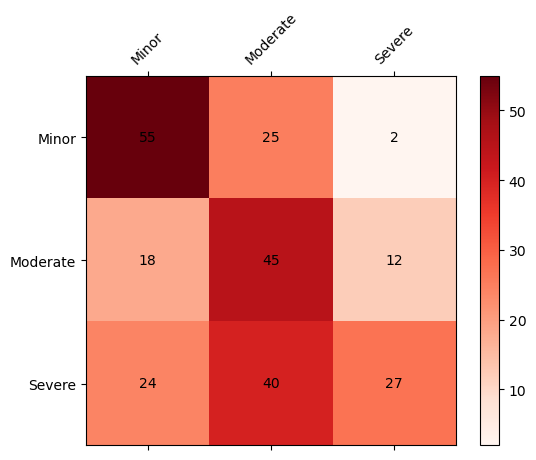

Classification Report:
              precision    recall  f1-score   support

       Minor       0.57      0.67      0.61        82
    Moderate       0.41      0.60      0.49        75
      Severe       0.66      0.30      0.41        91

    accuracy                           0.51       248
   macro avg       0.54      0.52      0.50       248
weighted avg       0.55      0.51      0.50       248



In [11]:
import numpy as np
val_images, val_labels = [], []
class_names = sorted(train_generator.class_indices.keys())
for i in range(len(val_generator)):
    images, labels = val_generator[i]
    val_images.extend(images)
    val_labels.extend(np.argmax(labels, axis=1))


val_images = np.array(val_images)
val_labels = np.array(val_labels)

predictions = model.predict(val_images)


from sklearn.metrics import confusion_matrix, classification_report

y_pred = np.argmax(predictions, axis=1)
y_true = val_labels

confusion_matrix = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots()
cax = ax.matshow(confusion_matrix, cmap='Reds')

cbar = fig.colorbar(cax)

ax.set_xticklabels([''] + class_names, rotation=45) #CHANGED TO SAY CLASS_NAMES
ax.set_yticklabels([''] + class_names) #cHANGED TO SAY CLASS NAMES

for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center')
print('Confusion Matrix:')

plt.show()



report = classification_report(y_true, y_pred, target_names=class_names)
print('Classification Report:')
print(report)


In [12]:
model.save('damage_classification_model.keras')

In [13]:
#ADDED COST MAPPING FOR NEW FOLDERS
cost_map = {
    "Minor-1": 50, "Minor-2": 100, "Minor-3": 150, "Minor-4": 200,
    "Moderate-1": 300, "Moderate-2": 350, "Moderate-3": 400, "Moderate-4": 450,
    "Severe-1": 550, "Severe-2": 600, "Severe-3": 650, "Severe-4": 700
}

In [14]:
image_paths = []
for class_name in class_names:
    folder_path = os.path.join(val_dir, class_name)
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_paths.append(os.path.join(folder_path, filename))
negative = 0
positive = 0
for image_path in image_paths:
    img = tf.keras.preprocessing.image.load_img(image_path)
    img = img.resize((img_width, img_height))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    img = tf.expand_dims(img, axis=0)
    pred = model.predict(img)
    pred_label = class_names[np.argmax(pred)]
    folder_name = os.path.basename(os.path.dirname(image_path))
 
    predicted_cost = cost_map[pred_label]  #COST PREDICTION
    actual_cost = cost_map[folder_name]  #COST FROM MAPPING

    plt.imshow(img[0])
    #UPDATED BELOW
    if pred_label != folder_name:
        plt.title(f'Pred: {pred_label} (${predicted_cost})\nActl: {folder_name} (${actual_cost})', color='red')
        negative += 1
    else:
        plt.title(f'Pred: {pred_label} (${predicted_cost})\nActl: {folder_name} (${actual_cost})', color='green')
        positive += 1

    plt.axis('off')
    plt.show() 
print('False: '+ str(negative) + '\nTrue: ' + str(positive))

False: 0
True: 0
